### AirBNB Listing Analysis:
OBjective 1: Data Prep and Question:
 - _Read in the Airbnb listing data (use `low_memory=False` and `encoding="ISO-8859-1"` in `read_csv`)._
- _Cast any data columns as a datetime format._
- _Filter down the data to just listings in the city of Paris._
- _QA the Paris listings data:_
   - _Check for missing values._
   - _Calculate the minimum, maximum, and average for each._


In [41]:
import os
print(os.getcwd())
print(os.listdir())

C:\Users\USER\Python Portfolio Project\Portfolio-Project-2_AirBnB-Analyze-SQL
['.git', '.gitattributes', '.ipynb_checkpoints', 'AirBNB Analysis.ipynb', 'Listings.csv']


In [42]:
import pandas as pd
Listings = pd.read_csv("Listings.csv", 
                       encoding="ISO-8859-1", 
                       low_memory=False, 
                       parse_dates = ["host_since"])

In [43]:
Listings.head(10)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
5,4898654,NEW - Charming apartment Le Marais,505535,2011-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
6,6021700,2P - Entre Bastille et Republique,8053690,2013-08-09,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
7,6945740,57sqm btw. Bastille & PÃÂ¨re Lachaise,5924709,2013-04-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
8,7491966,Charming appartment near the Parc Buttes Chaumont,35812762,2015-06-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
9,7849932,Bel appartement plein de charme !,20833291,2014-09-02,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [44]:
Listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

#### Filter data down to row, where city is Paris, and keep only the columns 'host_since', 'neighbourhood', 'city', 'accommodates', 'price' in table.


In [45]:
paris_Listings = Listings.query("city == 'Paris'").loc[:, ["host_since", 
                                                           "neighbourhood", 
                                                           "city", "accommodates", 
                                                           "price"]]
paris_Listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [46]:
paris_Listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [47]:
paris_Listings.describe

<bound method NDFrame.describe of        host_since      neighbourhood   city  accommodates  price
0      2011-12-03  Buttes-Montmartre  Paris             2     53
1      2013-11-29  Buttes-Montmartre  Paris             2    120
2      2014-07-31             Elysee  Paris             2     89
3      2013-12-17          Vaugirard  Paris             2     58
4      2014-12-14              Passy  Paris             2     60
...           ...                ...    ...           ...    ...
279707 2015-04-13       Observatoire  Paris             2    120
279708 2013-11-27  Buttes-Montmartre  Paris             2     60
279709 2012-04-27  Buttes-Montmartre  Paris             2     50
279710 2015-07-16         Popincourt  Paris             2    105
279711 2013-06-17  Enclos-St-Laurent  Paris             2     70

[64690 rows x 5 columns]>

##### From the look from the data above, an oddity which the price of 0 exist, need investigation.

In [48]:
paris_Listings.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [49]:
paris_Listings.query("price == 0").count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

##### From this result, show 54 accommodates missing value and 64 price missing value.

In [50]:
paris_Listings.query("price == 0 and accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

OBjective 2: Prepare for Visualization. 
 - _Create a Dataframe called "paris_Listings_neighbourhood". Group the Paris listings by neighbourhood and calculate the average price for each. Sort by price in ascending order._

- _Create a dataframe call "paris_listings_accomodations". Filter your data down to the most expensive neighbourhood in Paris. Group it by "accomodates" and calculate the average price for each. Sort by price in ascending order._

- _Finally, create a Dataframe, called "paris_Listings_over_time". Group the data by the year component of "host_since". Calculate a count of rows to get the number of new hosts for each year, and the average price of listings for each years._

- _Task 1: Create table name paris_listings_neighbourhood, groups Paris listing by "neighbourhood", to calculate the mean price for each neighborhood sorted from lowest to highest average price._

- _Task 2: Create table name paris_listings_accomodations, show the most expensive neighborhood in Paris, grouped by accommodation, contain the mean price for each value of accomodate sorted from lowest to highest average price._

-  _Task 3: Create table name paris_listings_over_time, group by the year of host since column, calculate a count of row, representing a total number of new hosts, and average price for each year._

In [51]:
paris_Listings_neighbourhood = (
    paris_Listings
    .groupby("neighbourhood")
    .agg({"price": "mean"})
    .sort_values("price")
)
paris_Listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [52]:
paris_Listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [53]:
paris_Listings_accommodates = (
    paris_Listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price": "mean"})
    .sort_values("price")
)
paris_Listings.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [54]:
paris_Listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [56]:
paris_Listings_over_time = (
    paris_Listings
    .set_index("host_since")
    .resample("YE")
    .agg({
        "neighbourhood": "count",
        "price": "mean"
         })
)
paris_Listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


OBjective 3: Visualize the Data.
 - _Task 1: Create horizontal bar chart of the average price by neighbourhood in Paris, add a title and change axis labels as needed._

- _Task 2: Create horizontal bar chart of the average price by "accommodates" in Pairs, most expensive neighborhood. Make sure to add a title and change axis labels as needed_


- _Task 3: Create two line charts: One of the count of new hosts over time, one for average price, make sure to set the y-axis limit to 0, add a title, and change axis labels as needed._


- _Task 4: Create a duel axis line chart that contains both new hosts and average price overtime._


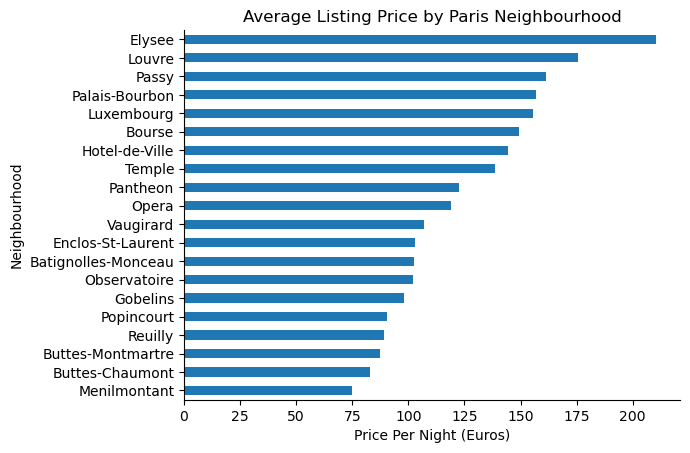

In [71]:
import seaborn as sns
(paris_Listings_neighbourhood
 .plot
 .barh(
     title = "Average Listing Price by Paris Neighbourhood",
     xlabel = "Price Per Night (Euros)",
     ylabel = "Neighbourhood",
     legend= None
 )
)

sns.despine()

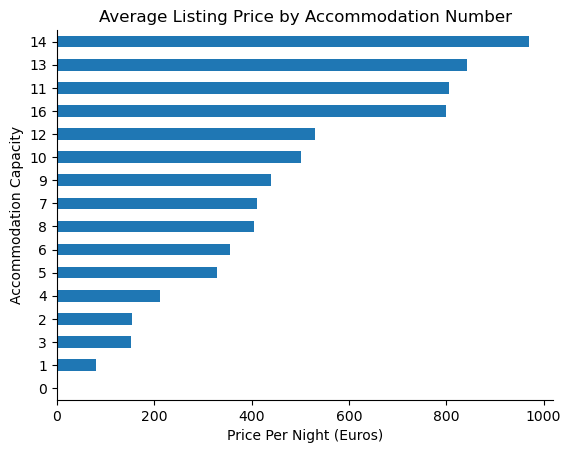

In [75]:
(paris_Listings_accommodates
 .plot
 .barh(
     title = "Average Listing Price by Accommodation Number",
     xlabel = "Price Per Night (Euros)",
     ylabel = "Accommodation Capacity",
     legend= None
 )
)
sns.despine()

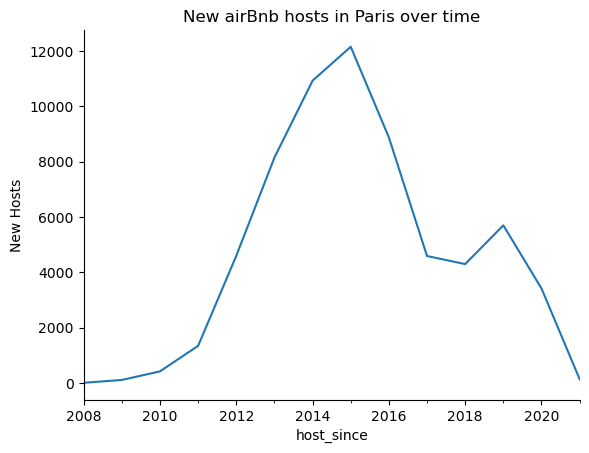

In [76]:
paris_Listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    title= "New airBnb hosts in Paris over time"
)
sns.despine()